Insurance cost as age increases


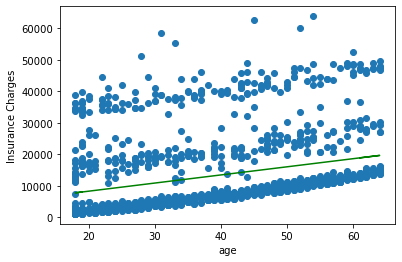

Insurance of men vs women


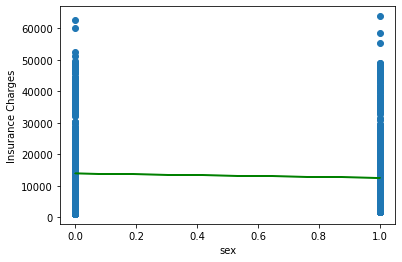

Insurance as BMI increases


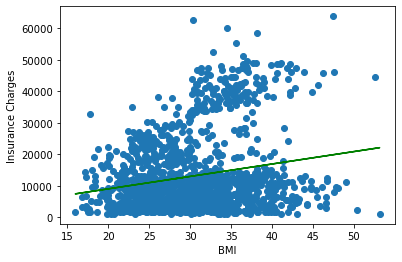

Insurance as number of children increases


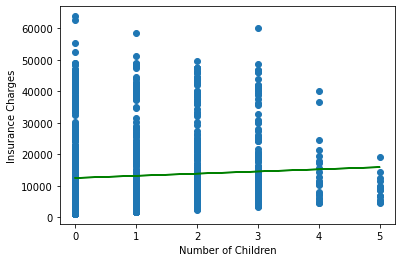

Insurance of non smokers vs smokers


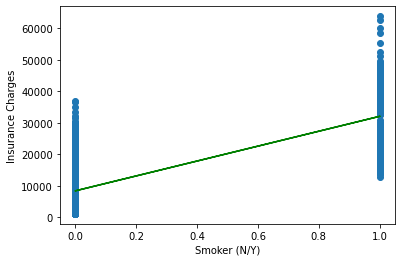

Insurance cost by region


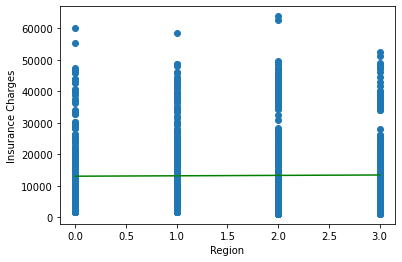

Calculating Age
Line of best fit is y = 257.7226186668952 * x + 3165.8850060630393
The line's standard error is -1.306034391745925e-09
-1.1186784831807017e-09
Age R Squared: -0.16747967479674797
 
Calculating Sex
Line of best fit is y = -1387.1723338865747 * x + 13956.751177721908
The line's standard error is -7.530616130679846e-10
-1.1186784831807017e-09
Sex R Squared: 0.3268292682926829
 
Calculating BMI
Line of best fit is y = 393.87303079739513 * x + 1192.937208961157
The line's standard error is -6.602931534871459e-09
-1.1186784831807017e-09
BMI R Squared: -4.902439024390244
 
Calculating children
Line of best fit is y = 683.089382481369 * x + 12522.495549644093
The line's standard error is -1.4661054592579603e-09
-1.1186784831807017e-09
Children R Squared: -0.3105691056910569
 
Calculating smoking
Line of best fit is y = 23615.963533676193 * x + 8434.268297856295
The line's standard error is 3.128661774098873e-10
-1.1186784831807017e-09
Smoker R Squared: 1.2796747967479676
 
Calc

In [1]:
#Code by Braden Clough
#imports pandas to make use of a dataframe
import pandas
#imports pyplot as plt for graphing
import matplotlib.pyplot as plt
#import python numbers
import numpy
#imports the csv file as a dataframe
file = pandas.read_csv('insurance.csv')
#Creates a scatter plot of insurance cost and age
print("Insurance cost as age increases")
plt.scatter(file.age, file.charges, marker='o')
plt.xlabel("age")
plt.ylabel("Insurance Charges")
m, b = numpy.polyfit(file.age, file.charges,1)
plt.plot(file.age, m*file.age+b, 'g-')
plt.show()
print("Insurance of men vs women")
plt.scatter(file.sex, file.charges, marker='o')
plt.xlabel("sex")
plt.ylabel("Insurance Charges")
m, b = numpy.polyfit(file.sex, file.charges,1)
plt.plot(file.sex, m*file.sex+b, 'g-')
plt.show()
print("Insurance as BMI increases")
plt.scatter(file.bmi, file.charges, marker='o')
plt.xlabel("BMI")
plt.ylabel("Insurance Charges")
m, b = numpy.polyfit(file.bmi, file.charges,1)
plt.plot(file.bmi, m*file.bmi+b, 'g-')
plt.show()
print("Insurance as number of children increases")
plt.scatter(file.children, file.charges, marker='o')
plt.xlabel("Number of Children")
plt.ylabel("Insurance Charges")
m, b = numpy.polyfit(file.children, file.charges,1)
plt.plot(file.children, m*file.children+b, 'g-')
plt.show()
print("Insurance of non smokers vs smokers")
plt.scatter(file.smoker, file.charges, marker='o')
plt.xlabel("Smoker (N/Y)")
plt.ylabel("Insurance Charges")
m, b = numpy.polyfit(file.smoker, file.charges,1)
plt.plot(file.smoker, m*file.smoker+b, 'g-')
plt.show()
print("Insurance cost by region")
plt.scatter(file.region, file.charges, marker='o')
plt.xlabel("Region")
plt.ylabel("Insurance Charges")
m, b = numpy.polyfit(file.region, file.charges,1)
plt.plot(file.region, m*file.region+b, 'g-')
plt.show()


#calculates the mean of y for later use
yAverage = file.charges.mean()
#calculates SE of y's mean for later use
SEyAverage = 0
for i in range(0, len(file.charges)):
    SEyAverage += file.charges[i] - yAverage
    
#This method can calculate the R Squared using insurance cost as the Y axis and the parameter as the X axis
def calcRSquared(xColumn):
    #calculates the mean of the x Axis
    xAverage = xColumn.mean()
    #calculates the top of the m function
    mTop = 0
    for i in range(0, len(xColumn)):
        mTop += (xColumn[i] - xAverage) * (file.charges[i] - yAverage)
    #calculates the bottom of the m function
    mBottom = 0
    for i in range(0, len(xColumn)):
        mBottom+= pow((xColumn[i] - xAverage), 2)
    #calculates m
    m = mTop / mBottom
    #calculates b
    b = yAverage - m * xAverage
    print("Line of best fit is y = " + str(m) + " * " + "x" + " + " + str(b))
    #calculates SE of the line of best fit
    SEline = 0
    for i in range(0, len(file.charges)):
        SEline += file.charges[i] - (m * xColumn[i] + b)
    print("The line's standard error is " + str(SEline))
    #calculates and returns R Squared
    print(SEyAverage)
    rSquared = 1 - (SEline / SEyAverage)
    return rSquared

#Calculates R Squared for all the relevant categories
print("Calculating Age")
ageRSquared = calcRSquared(file.age)
print("Age R Squared: " + str(ageRSquared))
print(" ")
print("Calculating Sex")
sexRSquared = calcRSquared(file.sex)
print("Sex R Squared: " + str(sexRSquared))
print(" ")
print("Calculating BMI")
bmiRSquared = calcRSquared(file.bmi)
print("BMI R Squared: " + str(bmiRSquared))
print(" ")
print("Calculating children")
childrenRSquared = calcRSquared(file.children)
print("Children R Squared: " + str(childrenRSquared))
print(" ")
print("Calculating smoking")
smokerRSquared = calcRSquared(file.smoker)
print("Smoker R Squared: " + str(smokerRSquared))
print(" ")
print("Calculating region")
regionRSquared = calcRSquared(file.region)
print("Region R Squared: " + str(regionRSquared))
print(" ")

#Creates a list of tuples, with each tuple consisting of the title of the axis as well as its R Squared value.
#This will be used to calculate the best R Squared
rSquaredTuples = []
rSquaredTuples.append(("age", ageRSquared))
rSquaredTuples.append(("sex", sexRSquared))
rSquaredTuples.append(("BMI", bmiRSquared))
rSquaredTuples.append(("children", childrenRSquared))
rSquaredTuples.append(("smoking", smokerRSquared))
rSquaredTuples.append(("region", regionRSquared))

#Creates a base value tuple that should be replaced when the tuples are compared to each other
bestRIndex = ("Error", -1000000)

#Finds the highest explaining power by comparing the R Value of each tuple against each other and recording the best one
#This comparison disregards R Squareds with a value higher than 1, as those are too inaccurate to have value for regression
for i in range(0, len(rSquaredTuples)):
    if(rSquaredTuples[i][1] > bestRIndex[1] and rSquaredTuples[i][1] <= 1):
        bestRIndex = rSquaredTuples[i]
print("The factor with the best explaining power for insurance cost is " + str(bestRIndex[0]) + " with an explaining power of " + str(bestRIndex[1]))